# Capítulo 5 - Introdução ao pandas

Pode ser mais fácil importar as estruturas de dados *Series* e *DataFrame* para o namespace local já que elas são muito usadas:

In [1]:
from pandas import Series, DataFrame

## 5.1 Introdução às estruturas de dados do pandas

### Series

>É um objeto de tipo array unidimensional que contém uma sequência de valores de mesmo tipo e um array associado com rótulos de dados chamado *índice*.

In [7]:
import pandas as pd

In [8]:
# A Series mais simples é formada a partir de um array de dados:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Um índice padrão é composto por inteiros de `0 ` a ` N -1` (onde `N` é a extensão dos dados).

Você pode obter a representação do array e o objeto de índice da Series por meio de seus atributos `array` e `index`, respectivamente:

In [9]:
obj.array

<NumpyExtensionArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

In [10]:
obj.index

RangeIndex(start=0, stop=4, step=1)

É recomendável criar uma Series com um índice que identifique cada ponto de dados com rótulo:

In [11]:
obj2 = pd.Series([4,7,-5,3], index=["d","b","a","c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [12]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Podemos usar rótulos no índice ao selecionar valores individuais ou um conjunto de valores:

In [13]:
obj2["a"]

np.int64(-5)

In [14]:
obj2["d"] = 6

In [15]:
obj2[["c","a","d"]]

c    3
a   -5
d    6
dtype: int64

Usar funções ou operações com as do Numpy, preservará a ligação entre índice e valor:

In [16]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [17]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [18]:
import numpy as np
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Outra maneira de considerar uma Series seria como um dicionário ordenado de tamanho fixo.

In [19]:
"b" in obj2

True

In [20]:
"e" in obj2

False

In [21]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Uma Series pode ser convertida novamente em um dicionários com seu método **`to_dict`**:

In [22]:
obj3.to_dict()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

o índice da Series respeitará a ordem das chaves de acordo com o método `keys` do dicionário, que depende da ordem de inserção das chaves.
Você pode sobrescrever esse comportamento passando um índice com as chaves do dicionário na ordem que deseja que elas apareçam na Series resultante:

In [23]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

já que nenhum valor foi encontrado para *California*, ele aparece como `NaN`.

As funções **`isna`** e **`notna`** do pandas devem ser usadas para detectar dados ausentes:

In [24]:
pd.isna(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [25]:
pd.notna(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Uma Series tem esses métodos como métodos de instância:

In [26]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Series fazem alinhamento automático pelo rótulo do índice em operações aritméticas:

In [27]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Tanto o objeto Series quanto seu índice têm um atributo **`name`**:

In [30]:
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Um índice de uma Series pode ser alterado diretamente no local por atribuição:

In [31]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [32]:
obj.index = ["Bob","Steve","Jeff","Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

>Representa uma tabela de dados retangular e contém uma coleção ordenada e nomeada de colunas, cada uma podendo ter um tipo de valor diferente (numérico, string, booleano etc...). O Dataframe tem um índice tanto para a linha quanto para a coluna; ele pode ser considerado um dicionário de Series, todas compartilhando o mesmo índice.

Existem muitas maneiras de criar um DataFrame, embora um das mais comuns seja a partir de um dicionário de listas de mesmo tamanho ou de arrays NumPy:

In [33]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
       }
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [34]:
#exemplo retirado do chatGPT

data1 = {
    "Nome": ["Ana", "Bruno", "Carlos"],
    "Idade": [23, 31, 19],
    "Cidade": ["SP", "RJ", "MG"]
}

In [35]:
df = pd.DataFrame(data1)
df

,Nome,Idade,Cidade
0,Ana,23,SP
1,Bruno,31,RJ
2,Carlos,19,MG


Para DataFrames grandes, o método **`head`** só seleciona as cinco primeiras linhas:

In [36]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Da mesma forma **`tail`** retorna as cinco últimas linhas:

In [37]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Se você especificar uma sequência de colunas, as colunas do DataFrame serão organizadas nesta ordem:

In [38]:
pd.DataFrame(data, columns=["year","state","pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Se passar uma coluna que não esteja contida no dicionário, ela aparecerá com valores ausentes no resultado:

In [39]:
frame2 = pd.DataFrame(data, columns=["year","state","pop","debt"])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [40]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Uma coluna de um DataFrame pode ser recuperada como uma Series por uma notação, como a do dicionário, ou com o uso da notação de atributo com ponto:

In [41]:
frame2["state"]

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [42]:
frame2.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

As linhas também podem ser recuperadas pela posição ou pelo nome com os atributos especiais `iloc` e `loc`:

In [46]:
frame2.loc[1]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: 1, dtype: object

In [51]:
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


As colunas podem ser modificadas por atribuição. Por exemplo, a coluna vazia `debt` poderia receber um valor escalar ou um array de valores:

In [53]:
frame2["debt"] = 16.5
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,16.5
1,2001,Ohio,1.7,16.5
2,2002,Ohio,3.6,16.5
3,2001,Nevada,2.4,16.5
4,2002,Nevada,2.9,16.5
5,2003,Nevada,3.2,16.5


In [54]:
frame2["debt"] = np.arange(6.)
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


In [55]:
val = pd.Series([-1.2,-1.5,-1.7], index=["two","four","five"])
frame2["debt"] = val
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


A palavra-chave **`del`** exclui colunas como ocorre em um dicionário. Como exemplo, primeiro adicionarei uma nova coluna de valores booleanos na qual a coluna `state` é igual a "Ohio":

In [56]:
frame2["eastern"] = frame2["state"] == "Ohio"
frame2

,year,state,pop,debt,eastern
0,2000,Ohio,1.5,NaN,True
1,2001,Ohio,1.7,NaN,True
2,2002,Ohio,3.6,NaN,True
3,2001,Nevada,2.4,NaN,False
4,2002,Nevada,2.9,NaN,False
5,2003,Nevada,3.2,NaN,False


o método `del` pode então ser usado para remover essa coluna:

In [58]:
del frame2["eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [59]:
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


Outro formato de dado comum é um dicionário de dicionários aninhados:

In [60]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
              "Nevada": {2001: 2.4, 2002: 2.9}}

Se o dicionário aninhado for passado para o DataFrame, o pandas interpretará as chaves do dicionário mais externo como sendo as colunas e as chaves mais internas como sendo os índices das linhas:

In [64]:
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


Você pode fazer a transposição do DataFrame (trocar linhas e colunas) com uma sintaxe semelhante à de um array NumPy:

In [65]:
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


As chaves dos dicionários mais internos são combinadas para formar o índice no resultado. Isso não ocorrerá se um índice explícito for especificado:

In [66]:
pd.DataFrame(populations, index=[2001,2002,2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


Os dicionários de Series são tratados de forma semelhante:

In [67]:
pdata = {"Ohio": frame3["Ohio"][:-1],
        "Nevada": frame3["Nevada"][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


Se o índice `index` e as colunas `columns` de um DataFrame tiverem seus atributos `name` definidos, estes também serão exibidos:

In [68]:
frame3.index.name = "year"
frame3.columns.name = "state"
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


Ao contrário das Series, o DataFrame não tem um atributo `name`. O método `to_numpy` retorna os dados contidos no DataFrame como um ndarray bidimensional:

In [69]:
frame3.to_numpy()

array([[1.5, nan],
       [1.7, 2.4],
       [3.6, 2.9]])

In [70]:
frame2.to_numpy()

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### Objetos Index

> Os objetos Index do pandas são responsáveis por conter os rótulos dos eixos (incluindo o nome das colunas de um DataFrame) e outros metadados (como o nome ou os nomes dos eixos.) Qualquer array ou sequência de rótulos que você usar ao criar uma Series ou um DataFrame será convertido internamente em um Index:

In [71]:
import numpy as np

In [72]:
obj = pd.Series(np.arange(3), index=["a","b","c"])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

Os objetos Index são imutáveis e, portanto, não podem ser modificados pelo usuário:

In [73]:
index[1] = "d" # TypeError

TypeError: Index does not support mutable operations

A imutabilidade torna mais seguro compartilhar objetos Index entre as estruturas de dados:

In [74]:
labels = pd.Index(np.arange(3))
labels

Index([0, 1, 2], dtype='int64')

In [75]:
obj2 = pd.Series([1.5,-2.5,0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [76]:
obj2.index is labels

True

Além de ser como um array, Um Index também se comporta como um conjunto de tamanho fixo:

In [77]:
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [78]:
frame3.columns

Index(['Ohio', 'Nevada'], dtype='object', name='state')

In [79]:
"Ohio" in frame3.columns

True

In [80]:
2003 in frame3.index

False

Ao contrário dos conjuntos Python, Um Index do pandas pode conter rótulos duplicados:

In [81]:
pd.Index(["foo", "foo", "bar", "bar"])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

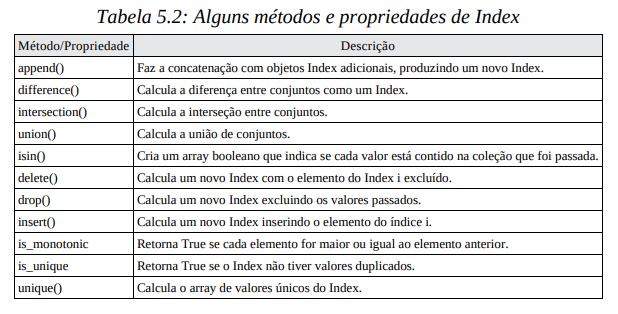

## 5.2 Funcionalidades essenciais

`reindex` cria um novo objeto com os valores reorganizados para ficarem alinhados com o novo índice:

In [7]:
import pandas as pd
import numpy as np

In [3]:
obj = pd.Series([4.5,7.2,-5.3,3.6], index=["d","b","a","c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Chamar `reindex` nessa Series reorganizará os dados de acordo com o novo índice, introduzindo valores ausentes se algum valor de índice não estiver presente:

In [4]:
obj2 = obj.reindex(["a","b","c","d","e"])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Para dados ordenados, como os de uma série temporal, você pode querer fazer alguma interpolação ou preenchimento de valores na reindexação. A opção `method` permite fazer isso, com o uso de um método como `ffill`, que repete o valor no preenchimento do próximo item: 

In [5]:
obj3 = pd.Series(["blue","purple","yellow"], index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [8]:
obj3.reindex(np.arange(6), method="ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

Com DataFrame, `reindex` pode alterar o índice (linha), as colunas ou ambos.
Quando recebe apenas uma sequência, ele reindexa as linhas no resultado:

In [9]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index=["a","c","d"], columns=["Ohio","Texas","California"])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [10]:
frame2 = frame.reindex(index=["a","b","c","d"])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


As colunas podem ser reindexadas com a palavra-chave `columns`:

In [11]:
states = ["Texas","Utah","California"]
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Já que "Ohio" não estava em "states", os dados dessa coluna não entraram no resultado.


Outra maneira de reindexar um eixo específico é passando os rótulos do novo eixo como argumento posicional e especificando o eixo para reindexação com a palavra-chave `axis`:

In [12]:
frame.reindex(states, axis="columns")

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


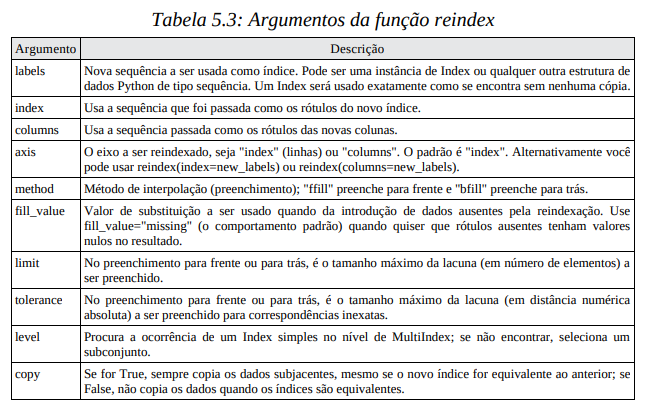

### Remoção de entradas de um eixo

In [13]:
obj = pd.Series(np.arange(5), index=["a","b","c","d","e"])
obj

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [14]:
new_obj = obj.drop("c")
new_obj

a    0
b    1
d    3
e    4
dtype: int64

In [15]:
obj.drop(["d","c"])

a    0
b    1
e    4
dtype: int64

In [16]:
data = pd.DataFrame(np.arange(16).reshape((4,4)), index=["Ohio", "Colorado", "Utah", "New York"], columns=["one","two","three","four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Chamar `drop` com uma sequência de rótulos removerá valores de rótulos das linhas (eixo 0)

In [17]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Para remover rótulos das colunas, use a palavra-chave `columns`:

In [18]:
data.drop(columns=["two"])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


Você também pode remover valores das colunas passando `axis=1` (como no NumPy) ou `axis="columns"`:

In [19]:
data.drop("two", axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [20]:
data.drop(["two", "four"], axis="columns")

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexação, seleção e filtragem

In [21]:
obj = pd.Series(np.arange(4), index=["a","b","c","d"])
obj

a    0
b    1
c    2
d    3
dtype: int64

In [22]:
obj["b"]

np.int64(1)

In [23]:
obj[1]

C:\Users\isaia\AppData\Local\Temp\ipykernel_10088\2469632899.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[1]


np.int64(1)

In [24]:
obj[2:4]

c    2
d    3
dtype: int64

In [25]:
obj[["b","a","d"]]

b    1
a    0
d    3
dtype: int64

In [26]:
obj[[1,3]]

C:\Users\isaia\AppData\Local\Temp\ipykernel_10088\1781339481.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[[1,3]]


b    1
d    3
dtype: int64

In [27]:
obj[obj<2]

a    0
b    1
dtype: int64

Embora você possa selecionar dados por rótulo desta forma, a melhor maneira de selecionar valores de índice é com operador especial `loc`:

In [28]:
obj.loc[["b","a","d"]]

b    1
a    0
d    3
dtype: int64

O operador `loc` é considerado melhor por causa do tratamento diferente dado aos inteiros na indexação com []. A indexação comum baseada em [] tratará os inteiros como rótulos se o índice contiver inteiros, logo, o comportamento diferirá dependendo do tipo de dado do índice.

In [29]:
obj1 = pd.Series([1,2,3], index=[2,0,1])
obj2 = pd.Series([1,2,3], index=["a","b","c"])
obj1

2    1
0    2
1    3
dtype: int64

In [30]:
obj2

a    1
b    2
c    3
dtype: int64

In [31]:
obj1[[0,1,2]]

0    2
1    3
2    1
dtype: int64

In [32]:
obj2[[0,1,2]]

C:\Users\isaia\AppData\Local\Temp\ipykernel_10088\2179584337.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj2[[0,1,2]]


a    1
b    2
c    3
dtype: int64

Com o uso de `loc`, a expressão `obj.loc[[0,1,2]]` falhará quando o índice não contiver inteiros:

In [33]:
obj2.loc[[0,1]]

KeyError: "None of [Index([0, 1], dtype='int64')] are in the [index]"

Já que o operador `loc` faz a indexação exclusivamente com rótulos, também existe um operador `iloc` que indexa exclusivamente com inteiros para funcionar consistentemente se o índice contiver ou não inteiros:

In [34]:
obj1.iloc[[0,1,2]]

2    1
0    2
1    3
dtype: int64

In [35]:
obj2.iloc[[0,1,2]]

a    1
b    2
c    3
dtype: int64

Você também pode fazer o fatiamento com rótulos, mas ele funcionará diferentemente do fatiamento normal do Python porque a extremidade final será incluída:

In [36]:
obj2.loc["b":"c"]

b    2
c    3
dtype: int64

Atribuir valores com o uso desses métodos modificará a seção correspondente da Series:

In [37]:
obj2.loc["b":"c"] = 5
obj2

a    1
b    5
c    5
dtype: int64

A indexação em um DataFrame recupera uma ou mais colunas com um único valor ou uma sequência:

In [38]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=["Ohio","Colorado","Utah","New York"],
                    columns=["one","two","three","four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [39]:
data["two"]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [40]:
data[["three","one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Uma indexação como essa tem alguns casos especiais. O primeiro é fatiar ou selecionar dados com um array booleano:

In [41]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [42]:
data[data["three"]>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


A sintaxe de seleção de linhas `data[:2]` é fornecida como conveniência. Passar um único elemento ou uma lista para o operador [] seleciona colunas.
Outro caso de uso seria a indexação com um DataFrame booleano, como um que fosse produzido por uma comparação escalar. Considere um DataFrame em que todos os valores fossem produzidos pela comparação com um valor escalar:

In [43]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


Podemos usar esse DataFrame para atribuir o valor 0 a cada local onde haja o valor `true`, desta forma:

In [44]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Seleção no DataFrame com loc e iloc

Você pode selecionar um subconjunto das linhas e colunas com uma notação como a do NumPy usando rótulos de eixos (loc) ou inteiros (iloc).

In [2]:
data

NameError: name 'data' is not defined

In [ ]:
data.loc["Colorado"]

In [ ]:
data.loc[["Colorado","New York"]]

In [ ]:
data.loc["Colorado",["two","three"]]

In [ ]:
data.iloc[2]

In [ ]:
data.iloc[[2,1]]

In [ ]:
data.iloc[2,[3,0,1]]

In [ ]:
data.loc[:"Utah","Two"]

In [ ]:
data.iloc[:,:3][data.three>5]

In [ ]:
data.loc[data.three>=2]

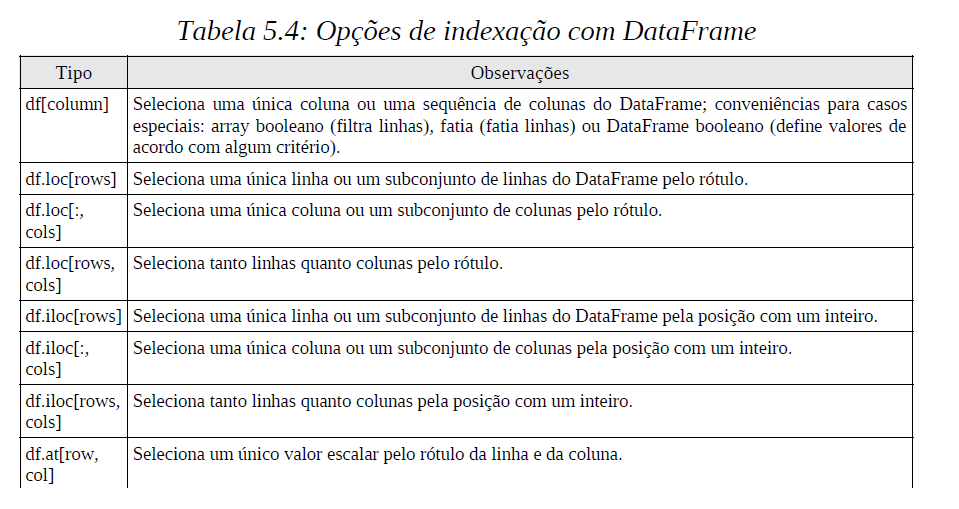

### Aritmética e alinhamento de dados

O Pandas pode simplificar muito o trabalho com objetos que tenham índices diferentes. Por exemplo, quando você somar objetos, se algum par de índices diferentes. Por exemplo, quando você somar objetos, se algum par de índices não for igual, o respectivo índice no resultado será a união dos pares de índices.

In [10]:
import pandas as pd
import numpy as np

In [6]:
s1 = pd.Series([7.3,-2.5,3.4,1.5], index=["a","c","d","e"])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1], index=["a","c","e","f","g"])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [7]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

A soma desses objetos gera:

In [8]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

O alinhamento de dados internos introduz valores ausentes nos locais dos rótulos que não se sobrepõem. Os valores ausentes serão então propagados para cálculos aritméticos posteriores.

No caso do DataFrame, o alinhamento é executado tanto nas linhas quanto nas colunas:

In [11]:
df1 = pd.DataFrame(np.arange(9.).reshape((3,3)), columns=list("bcd"), index=["Ohio","Texas","Colorado"])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)), columns=list("bde"), index=["Utah","Ohio","Texas","Oregon"])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [12]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


A soma desses dados retorna um DataFrame com índice e colunas que são as uniões dos dados de cada DataFrame:

In [13]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Já que as colunas "c" e "e" não se encontram nos dois objetos DataFrame, elas aparecem como ausentes no resultado. O mesmo ocorre para as linhas com rótulos que não são comuns aos dois objetos.

Se você somar objetos DataFrame sem rótulos de linha ou coluna em comum, o resultado só conterá nulos:

In [15]:
df1 = pd.DataFrame({"A":[1,2]})
df2 = pd.DataFrame({"B":[3,4]})
df1

,A
0,1
1,2


In [16]:
df2

,B
0,3
1,4


In [17]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


### Métodos aritméticos com valores para preenchimento

Como definir um valor específico para NA(nulo) atribuindo `np.nan` a ele:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)),
                  columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),
                  columns=list("abcde"))
df2.loc[1,"b"] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [3]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


A soma desses dados resulta em valores ausentes nos locais que não se sobrepõem:

In [4]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Usando o método `add` em df1, passarei df2 e um argumento para preenchimento de valor (fill_value), o que substituirá o valor passado para qualquer valor ausente na operação:

In [6]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Ao reindexar uma Series ou um DataFrame, você também pode especificar um valor diferente para preenchimento:

In [7]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


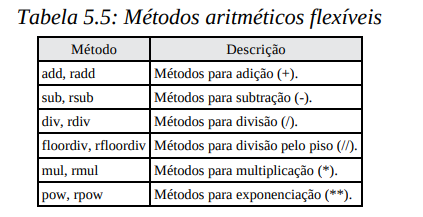

### Operações entre DataFrame e Series

Como ocorre com os arrays NumPy de dimensões diferentes, também há a aritmética entre os DataFrame e as Series. Primeiro, como um exemplo oportuno, considere a diferença entre um array bidimensional e uma de suas linhas:

In [8]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [9]:
arr[0]

array([0., 1., 2., 3.])

In [10]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

Quando subtraímos `arr[0]` de `arr`, a subtração é executada uma vez para cada linha. Isso se chama *broadcasting*.

As operações entre um DataFrame e uma Series são semelhantes:

In [12]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                    columns=list("bde"),
                    index=["Utah","Ohio","Texas","Oregon"])
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [13]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

Por padrão,a aritmética entre DataFrames e Series procura o índice da Series nas colunas do DataFrame, fazendo o broadcasting descendo pelas linhas:

In [14]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


Se um valor não for encontrado nas colunas do DataFrame ou no índice da Series, os objetos serão reindexados para formar a união:

In [16]:
series2 = pd.Series(np.arange(3), index=["b","e","f"])
series2

b    0
e    1
f    2
dtype: int64

In [17]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


Se em vez disso você quiser fazer o broadcasting pelas colunas, procurando uma correspondência nas linhas, terá de usar um dos métodos aritméticos e especificar que a busca será feita no índice. Por exemplo:

In [18]:
series3 = frame["d"]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [19]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [20]:
frame.sub(series3,axis="index")

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


O eixo passado é aquele onde será procurada a correspondência. Nesse caso queremos buscar a correspondência usando o índice de linha do DataFrame (axis="index") e fazer o broadcasting pelas colunas.

### Aplicação de funções e mapeamento

As unfucs do NumPy(métodos de arrays para todos os elementos) também funcionam com objetos do pandas:

In [21]:
frame = pd.DataFrame(np.random.standard_normal((4,3)),
                    columns=list("bde"),
                    index=["Utah","Ohio","Texas","Oregon"])
frame

,b,d,e
Utah,0.638950,-1.367405,-1.323613
Ohio,-1.659036,-0.190487,-2.070826
Texas,-1.014698,-1.342996,0.942387
Oregon,0.006422,2.278185,-1.316865


In [22]:
np.abs(frame)

,b,d,e
Utah,0.638950,1.367405,1.323613
Ohio,1.659036,0.190487,2.070826
Texas,1.014698,1.342996,0.942387
Oregon,0.006422,2.278185,1.316865


Outra operação frequente é a aplicação de uma função a cada coluna ou linha de arrays unidimensionais. O método `apply` do DataFrame faz exatamente isso:

In [23]:
def f1(x):
    return x.max() - x.min()
frame.apply(f1)

b    2.297986
d    3.645589
e    3.013213
dtype: float64

Aqui, a função `f`, que calcula a diferença entre os valores máximo e mínimo de uma Series, é chamada uma vez em cada coluna de `frame`. O resultado é uma Series que tem as colunas de `frame` como seu índice.
Se alternativamente você passar `axis="columns"` para `apply`, a função será chamada uma vez para cada linha. Uma maneira útil de pensar nisso seria como uma "aplicação pelas colunas":

In [24]:
frame.apply(f1, axis="columns")

Utah      2.006355
Ohio      1.880338
Texas     2.285383
Oregon    3.595050
dtype: float64

Muitas das operações estatísticas mais comuns existentes para arrays(como `sum` e `mean`) são métodos do DataFrame, logo, usar `apply` não será necessário.
A função passada para `apply` não precisa retornar um valor escalar; ela também pode retornar uma Series com vários valores:

In [25]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min","max"])
frame.apply(f2)

,b,d,e
min,-1.659036,-1.367405,-2.070826
max,0.638950,2.278185,0.942387


Funções Python para todos os elementos também podem ser usadas. Suponhamos que você quisesse obter uma string formatada a partir de cada valor de ponto flutuante de `frame`. É possível fazer isso com `applymap`:

In [27]:
def my_format(x):
    return f"{x:.2f}"
frame.applymap(my_format)

# DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\isaia\AppData\Local\Temp\ipykernel_11448\1239441525.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(my_format)


,b,d,e
Utah,0.64,-1.37,-1.32
Ohio,-1.66,-0.19,-2.07
Texas,-1.01,-1.34,0.94
Oregon,0.01,2.28,-1.32


O nome é `applymap` porque Series tem um método `map` para a aplicação de uma função a todos os elementos:

In [28]:
frame["e"].map(my_format)

Utah      -1.32
Ohio      -2.07
Texas      0.94
Oregon    -1.32
Name: e, dtype: object

### Ordenação e classificação

Ordenar um conjunto de dados de acordo com algum critério é outra operação interna importante. Para ordenar lexicograficamente pelo rótulo da linha ou da coluna, use o método `sort_index`, que retorna um novo objeto ordenado:

In [29]:
obj = pd.Series(np.arange(4), index=["d","a","b","c"])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [30]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

Com um DataFrame, você pode ordenar pelo índice em qualquer eixo:

In [35]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)), index=["three","one"], columns=["d","a","b","c"])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [36]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [37]:
frame.sort_index(axis="columns")

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Por padrão, os dados são posicionados em ordem crescente, mas também podem ser posicionados em ordem decrescente:

In [38]:
frame.sort_index(axis="columns", ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Para ordenar uma Series pelos seus valores, use seu método `sort_values`:

In [39]:
obj = pd.Series([4,7,-3,2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Por padrão, qualquer valor ausente será inserido no fim da Series:

In [40]:
obj = pd.Series([4, np.nan, -3,2])
obj.sort_values()

2   -3.0
3    2.0
0    4.0
1    NaN
dtype: float64

Os valores ausentes podem ser inseridos no início com o uso da opção `na_position`:

In [41]:
obj.sort_values(na_position="first")

1    NaN
2   -3.0
3    2.0
0    4.0
dtype: float64

Ao ordenar um DataFrame, você pode usar os dados de uma ou mais colunas como chaves de ordenação. Para fazê-lo, passe um ou mais nomes de coluna para `sort_values`:

In [42]:
frame = pd.DataFrame({"b": [4,7,-3,2], "a": [0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [43]:
frame.sort_values("b")

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


Para ordenar por múltiplas colunas, passe uma lista de nomes:

In [45]:
frame.sort_values(["a","b"])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


A classificação(ranking) atribui posições de um até o número de pontos de dados válidos de um array, começando pelo valor mais baixo. Os métodos `rank` das Series e do DataFrame são onde isso ocorre; por padrão, `rank` resolve empates atribuindo a classificação média a cada grupo:

In [46]:
obj = pd.Series([7,-5,7,4,2,0,4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

As classificações também podem ser atribuídas de acordo com a ordem em que elas forem observadas nos dados:

In [47]:
obj.rank(method="first")

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

Também podemos classificar em ordem decrescente:

In [48]:
obj.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

O DataFrame pode calcular classificações nas linhas e nas colunas:

In [49]:
frame = pd.DataFrame({"b": [4.3,7,-3,2], "a": [0,1,0,1],
                     "c": [-2,5,8,-2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [50]:
frame.rank(axis="columns")

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


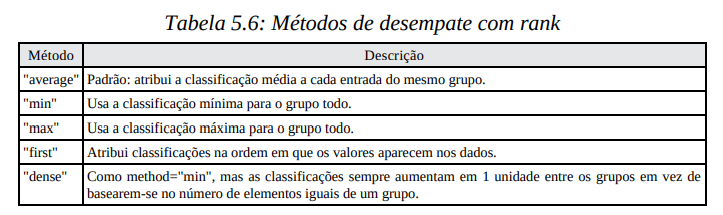

### Índices de eixos com rótulos duplicados

No pandas não é obrigatório que os índices sejam únicos, também é possível manipular índices que não são únicos.

In [52]:
obj = pd.Series(np.arange(5), index=["a","a","b","b","c"])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

A propriedade `is_unique` do índice pode informar se os seus rótulos são ou não únicos:

In [53]:
obj.index.is_unique

False

A seleção de dados é uma das principais tarefas que se comporta diferentemente com duplicidades. A indexação de um rótulo com várias entradas retorna uma Series, enquanto entradas únicas retornam um valor escalar:

In [54]:
obj["a"]

a    0
a    1
dtype: int64

In [55]:
obj["c"]

np.int64(4)

Talvez isso torne seu código mais complicado, já que o tipo de saída da indexação pode variar dependendo se um rótulo foi ou não repetido.
A mesma lógica pode ser aplicada à indexação de linhas (ou colunas) em um DataFrame:

In [57]:
df = pd.DataFrame(np.random.standard_normal((5,3)),
                  index=["a","a","b","b","c"])
df

,0,1,2
a,-0.229838,0.211248,0.439243
a,2.213003,0.923964,-1.163432
b,-0.165866,-0.070927,0.790559
b,1.684893,1.392509,-0.601055
c,1.074839,-1.233623,-0.755353
